In [6]:
import torch 
from torch import nn 
import numpy as np
import torch.nn.functional as F
%pylab inline
import numpy as np
np.set_printoptions(suppress=False)
import torch
import torch.nn  as nn
import torch.nn.functional as F
torch.set_printoptions(sci_mode=False)
import math
from connect2 import Connect2Game

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [7]:
from model import c_model
from connect2_wrapper import Connect2GameWrapper
game_wrapper = Connect2GameWrapper()
x, y = game_wrapper.generate_n_games(10000)
x = x.clone().detach()
y = y[0].clone().detach()
m = c_model(16)

0.4614172875881195
0.4811047911643982
0.4345915913581848
0.47264236211776733
0.44991686940193176
0.382357656955719
0.46949708461761475
0.5568673610687256
0.5784397721290588
0.42921486496925354
0.49884283542633057
0.4883098006248474
0.48851490020751953
0.40386494994163513
0.5247900485992432
0.5010696053504944
0.3959241807460785
0.5593563318252563
0.5083450675010681
0.46073758602142334
0.4763111472129822
0.5116007328033447
0.5174780488014221
0.42299288511276245
0.45061540603637695
0.5322960019111633
0.45185795426368713
0.40725013613700867
0.4384467899799347
0.4999973177909851
0.3953854441642761
0.4396442174911499
0.4330092668533325
0.43152743577957153
0.38911446928977966
0.3875958323478699
0.3928813934326172
0.47251513600349426
0.3945144712924957
0.4119841456413269
0.3447076678276062
0.45761385560035706
0.48539966344833374
0.44538772106170654
0.3720746338367462
0.3438849151134491
0.3532336354255676
0.42845699191093445
0.3324072062969208
0.35004597902297974
0.32057175040245056
0.339934676

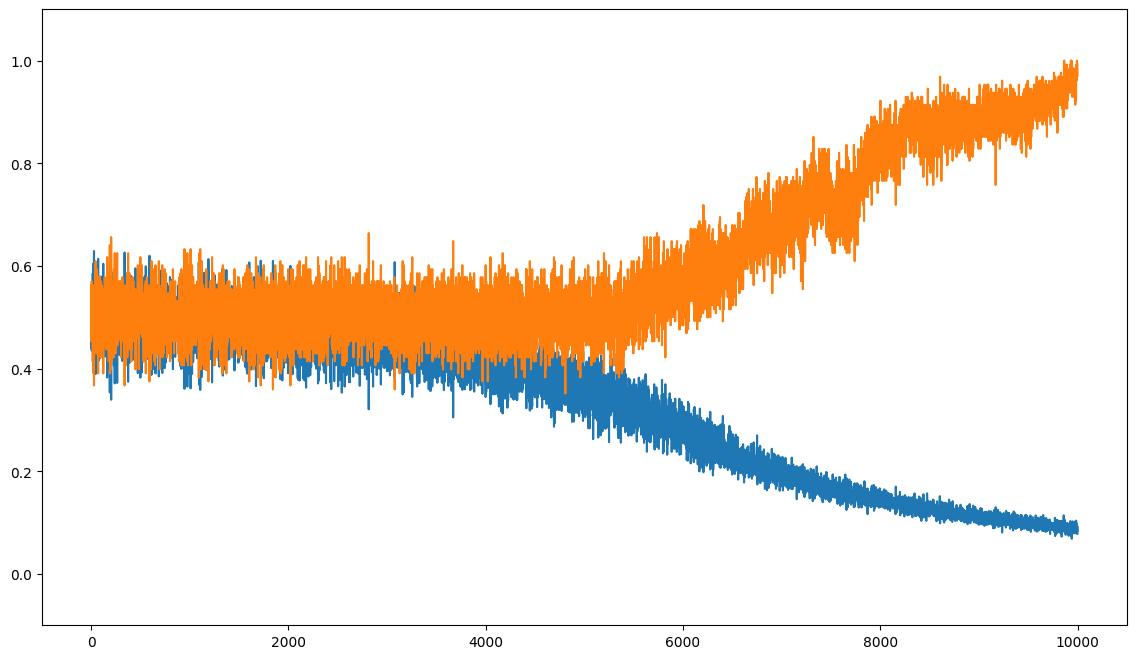

In [8]:

optim = torch.optim.SGD(m.parameters(), lr=0.001, momentum=0)
BS = 128
losses, accuracies = [], []
for i in range(10000):
    
    samp = np.random.randint(0,x.shape[0], size = BS)
    X = x[samp].view(-1, 16)
    Y = y[samp].view(-1,1).long()
    
    m.zero_grad()
    out = m.forward(X)
    
    
    loss = (Y - out) ** 2
    loss = loss.mean()

    out = torch.where(out > 0.5, torch.tensor(1.), out)
    out = torch.where(out < -0.5, torch.tensor(-1.), out)
    out = torch.where((out >= -0.5) & (out <= 0.5), torch.tensor(0.), out)
        
    accuracy = (out == Y).float().mean()
    loss.backward()
    optim.step()
    loss, accuracy = loss.item(), accuracy.item()
    losses.append(loss)
    accuracies.append(accuracy)
    if i % 100 == 0:
        print(loss)
figure(figsize = (14,8))
plt.ylim(-0.1, 1.1)
plot(losses)
plot(accuracies)


In [9]:
l1 = np.zeros((16,16), dtype = np.float32)
l2 = np.zeros((16,16), dtype = np.float32)
lsub = np.zeros((16,128), dtype = np.float32)
l3 = np.zeros((128,1), dtype = np.float32)
l1[:] = m.fc1.weight.detach().numpy().T
l2[:] = m.fc2.weight.detach().numpy().T
lsub[:] = m.sublayer.weight.detach().numpy().T
l3[:] = m.value_head.weight.detach().numpy().T

In [10]:
x = x[10].view(-1,16).numpy().dot(l1)
x = np.maximum(0,x)
x = x.dot(l2)
x = np.maximum(0, x)
x = x.dot(lsub)
x = np.maximum(0, x)
x = x.dot(l3)

x = np.tanh(x)

In [11]:
x

array([[0.08560866]], dtype=float32)

In [12]:
x, y[10]

(array([[0.08560866]], dtype=float32), tensor(1.))